# Lab 3 (Part 2)

#### Practise to create density maps from point dataset.
#### Answer the questions at the end and submit them together with Part 1 through Laulima by Feb 21.

## 1 Data Processing and Cleaning

Again, load required packages for this lab

In [2]:
import seaborn as sns
import pandas as pd
import geopandas as gpd

%matplotlib inline

Download the data for Lab 3 from [here](https://drive.google.com/file/d/1yKOWsD65nObE7CBobZjvaVIZz5GwA5UU/view?usp=sharing), and extract them to a folder in your computer.

Change the file path to the folder where your data are stored.

Note: different from Lab 2 where the crime data is in a shapefile, the crime data now is stored in a csv file (spreadsheet). You can open it in Excel or textbook to see how it looks like.

You need to use `pandas.read_csv` to read the file into a dataframe df

In [3]:
df = pd.read_csv("C:/Users/yi/Documents/UH_work/Teaching/GEOG389/labs/lab3_data/crime_geocoded.csv")

Print the information of the data frame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50150 entries, 0 to 50149
Data columns (total 5 columns):
Time            50150 non-null object
Location        50134 non-null object
Offence type    50134 non-null object
Lattitude       49576 non-null float64
Longitude       49576 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.head()

,Time,Location,Offence type,Lattitude,Longitude
0,3/30/2018 23:56,911100 BLOCK RENTON RD,PROPERTY DAMAGE,21.340979,-158.036141
1,3/30/2018 23:55,0 BLOCK KANEOHE BAY DR,DUI,21.422166,-157.748568
2,3/30/2018 23:54,ALA WAI BLVD&LAUNIU ST,THEFT,21.283894,-157.828388
3,3/30/2018 23:52,2200 BLOCK KALAKAUA AVE,THEFT,21.280109,-157.829519
4,3/30/2018 23:44,2200 BLOCK N KING ST,DUI,21.335475,-157.880452


Print the column names

In [6]:
df.columns

Index(['Time', 'Location', 'Offence type', 'Lattitude', 'Longitude'], dtype='object')

There is a typo in 'lattitude', which should be latitude.

We can use the following code to change the name of a specific column.

In [7]:
df = df.rename(columns={'Lattitude':'Latitude'})

Also replace 'Offence type' with 'Offence_type'. Try to avoid space when naming columns, as it would cause unnecessary trouble.

In [8]:
df = df.rename(columns={'Offence type':'Offence_type'})

Now print the column of `df` to check the new column names.

In [9]:
df.columns

Index(['Time', 'Location', 'Offence_type', 'Latitude', 'Longitude'], dtype='object')

Use jointplot function to create histograms along the longitude and latitude dimensions

The bars on the x and y axis indicate the number of points at that longitude and latitude.

Note: `df` is not a geodataframe object yet, so you cannot plot it using `matplotlib.plot` like we did in lab 2. 

We need to use the `jointplot` function in the `seaborn` package to plot it in a 2D space using the `Longitude` and `Latitude` columns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


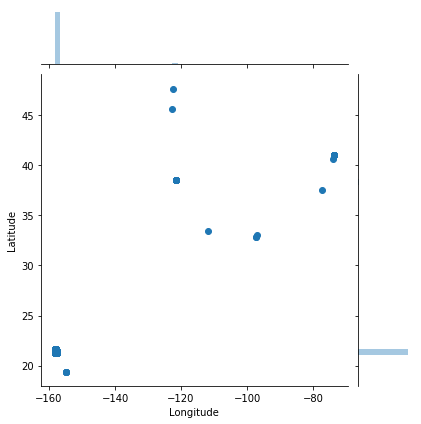

In [10]:
sns.jointplot(x="Longitude",y="Latitude",data =df)

The point distribution doesn't look right. This is because some points are not correctly located in Hawaii (due to geocoding errors)

So we only select the points within (-158.403, -157.553) in longitude and  (21.178 - 21.733) of latitude, which define a rectangle bounding box for Oahu.  

In [11]:
# First select points where the longitudes are in the range.
df = df[(df['Longitude']>-158.403)&(df['Longitude']<-157.533)]

# Next select points where the latitude are in the range
df = df[(df['Latitude']>21.178)&(df['Latitude']<21.733)]

Plot the histogram again. Do they look correct?

It looks better

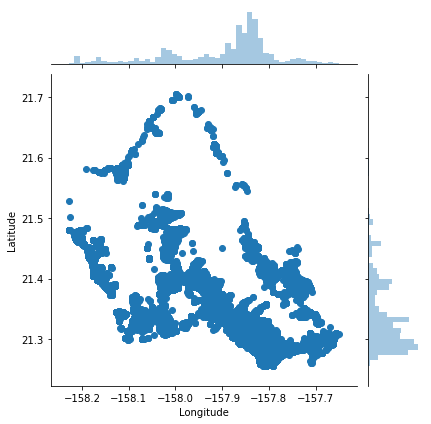

In [12]:
sns.jointplot(x="Longitude",y="Latitude",data =df)

## 2. Creating Kernel Density Map

Plot the histogram of Longitude.

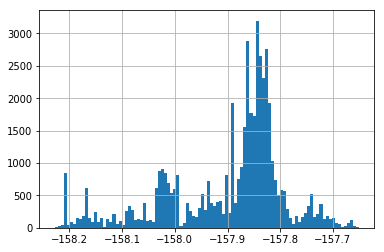

In [13]:
df['Longitude'].hist(bins=100)

Next, use kernel density to check the distribution of latitude and longitude in the dataset. Play with it by setting different parameters, such as bandwidth.

You can see the kernel density described a smoothier variation compared to the stairsteps in the histogram. The bandwidth is automatically chosen according to some statistics of the distribution.

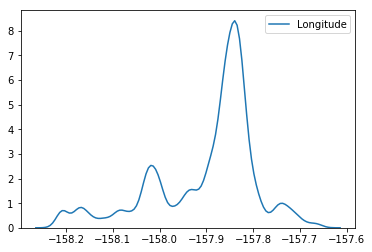

In [14]:
sns.kdeplot(df['Longitude'])

Mannually change the bandwidth to another value.

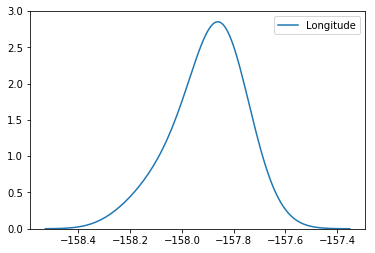

In [15]:
ax = sns.kdeplot(df.Longitude,bw = 0.1)

Create the kernel density for Latitude

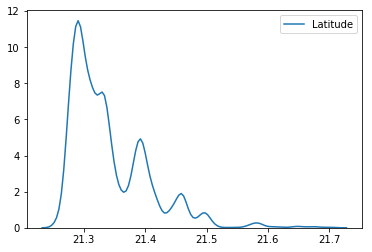

In [16]:
sns.kdeplot(df.Latitude)

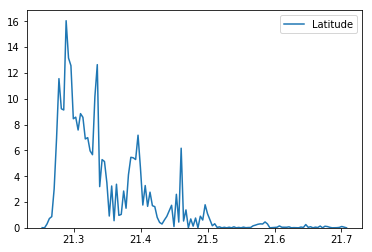

In [17]:
sns.kdeplot(df.Latitude,bw=0.001)

Change the bandwidth

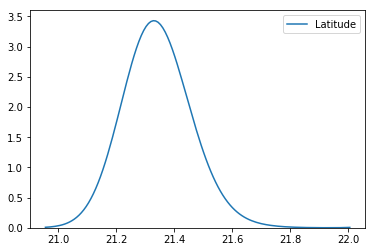

In [18]:
ax = sns.kdeplot(df.Latitude,bw = .1)

A kernel density map is a 2D surface combining both the latitude and longitude dimensions.

Next, we create a kernel density map for the crime data. It may take a long time to create the map for the entire dataset (~50k points).

To save time, we create kernel density for a specific type of crime.

Let's print out the numbers of different crimes first.

In [19]:
df.Offence_type.value_counts()

THEFT                 15027
UEMV                   6805
PROPERTY DAMAGE        4850
MOTOR VEH THEFT        3846
BURGLARY               3726
DUI                    2812
ASSAULT,SIMPLE         2722
DRUGS/NARCOTICS        1579
LIQUOR LAW             1466
FRAUD                  1172
THREATENING            1145
ROBBERY                 823
AGGRAVATED ASSAULT      671
LIC-PLATE THEFT         493
DISORDER CONDUCT        431
GRAFFITI                360
SEX ASSAULT             358
RAPE                    326
WEAPONS                 228
ARSON                   212
ROBBERY-VEH TAKEN        46
BURGLARY-VEH TAKEN        3
Name: Offence_type, dtype: int64

In [20]:
df.groupby(["Offence_type"]).count()

,Time,Location,Latitude,Longitude
Offence_type,,,,
AGGRAVATED ASSAULT,671,671,671,671
ARSON,212,212,212,212
"ASSAULT,SIMPLE",2722,2722,2722,2722
BURGLARY,3726,3726,3726,3726
BURGLARY-VEH TAKEN,3,3,3,3
DISORDER CONDUCT,431,431,431,431
DRUGS/NARCOTICS,1579,1579,1579,1579
DUI,2812,2812,2812,2812
FRAUD,1172,1172,1172,1172


Let's select BURGLARY first.

In [21]:
BURGLARY =df[df['Offence_type'] == 'BURGLARY']

Plot the kernel density. In default setting, the kernel density map is a contour map, which use contour lines to represent the gradients of density change.

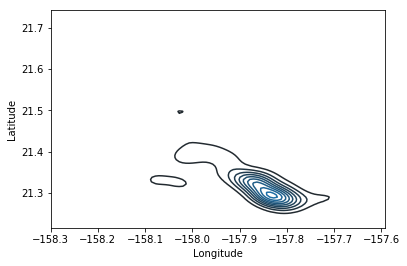

In [22]:
sns.kdeplot(BURGLARY['Longitude'],BURGLARY['Latitude'])

The plot is too small, let's adjust the defautl figure size

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 12]

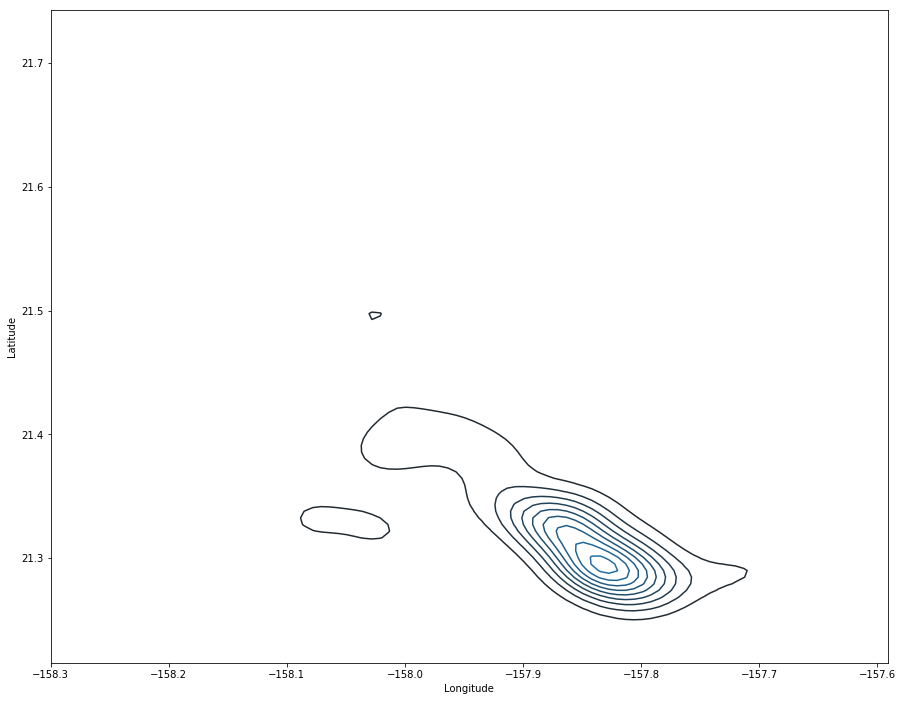

In [24]:
sns.kdeplot(BURGLARY['Longitude'],BURGLARY['Latitude'])

Add color to the map and change bw to 0.01

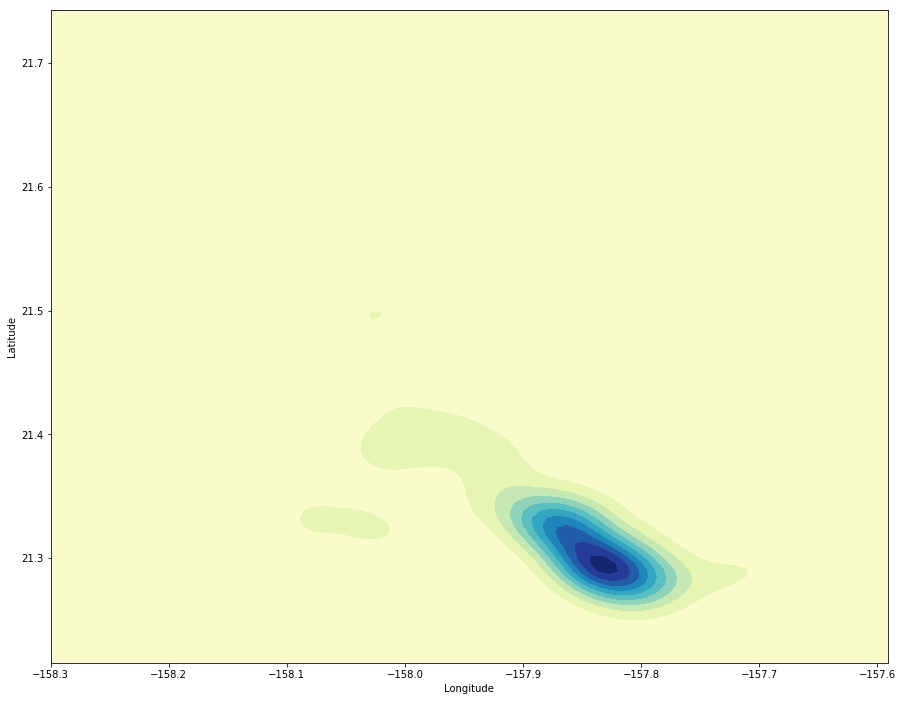

In [25]:
sns.kdeplot(BURGLARY['Longitude'],BURGLARY['Latitude'], shade = True,  cmap = 'YlGnBu')

Increase the color levels to make it smoothier by increasing the `n_levels` parameter.

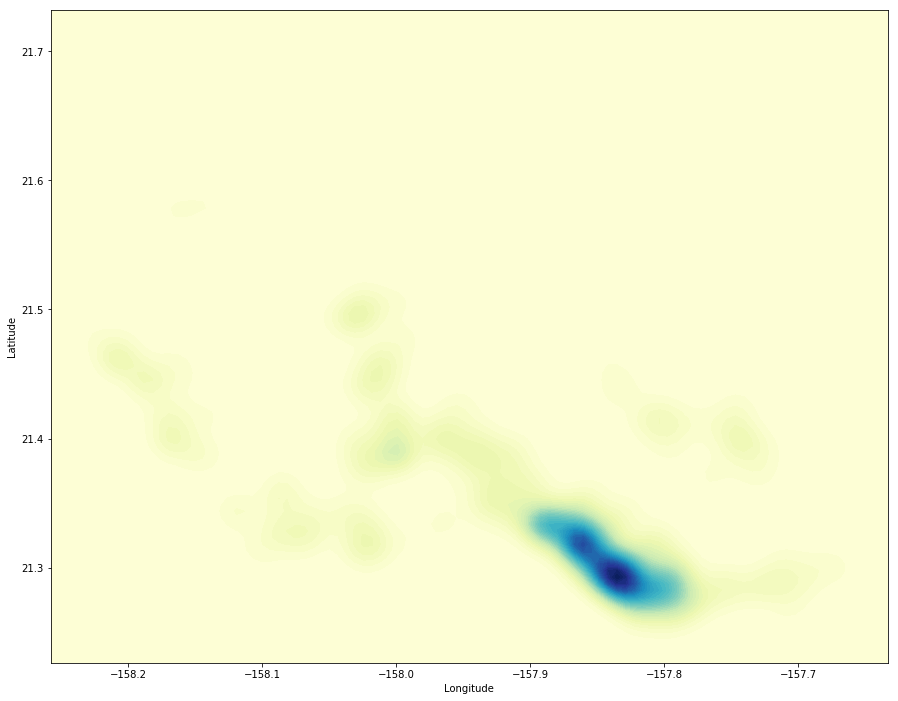

In [26]:
a = sns.kdeplot(BURGLARY['Longitude'],BURGLARY['Latitude'], n_levels=50, shade = True,  cmap = 'YlGnBu',bw = 0.01)

Try different bandwidth by changing `bw`

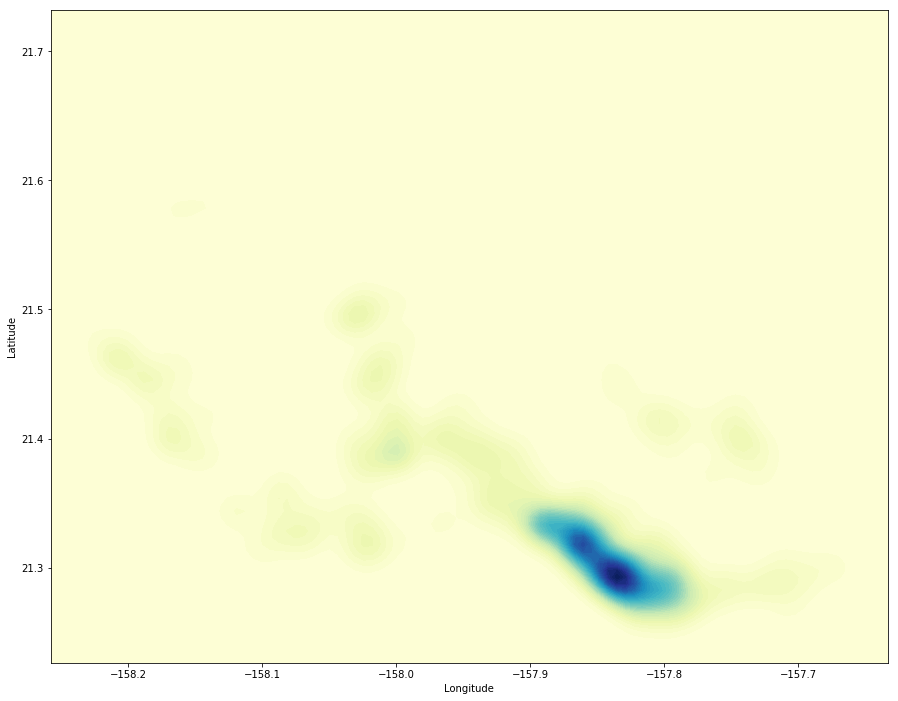

In [27]:
a = sns.kdeplot(BURGLARY['Longitude'],BURGLARY['Latitude'],n_levels=50, shade = True,  cmap = 'YlGnBu',bw = 0.01)

Remove the color of the lowest class by set `shade_lowest` to False to remove the lowest color level

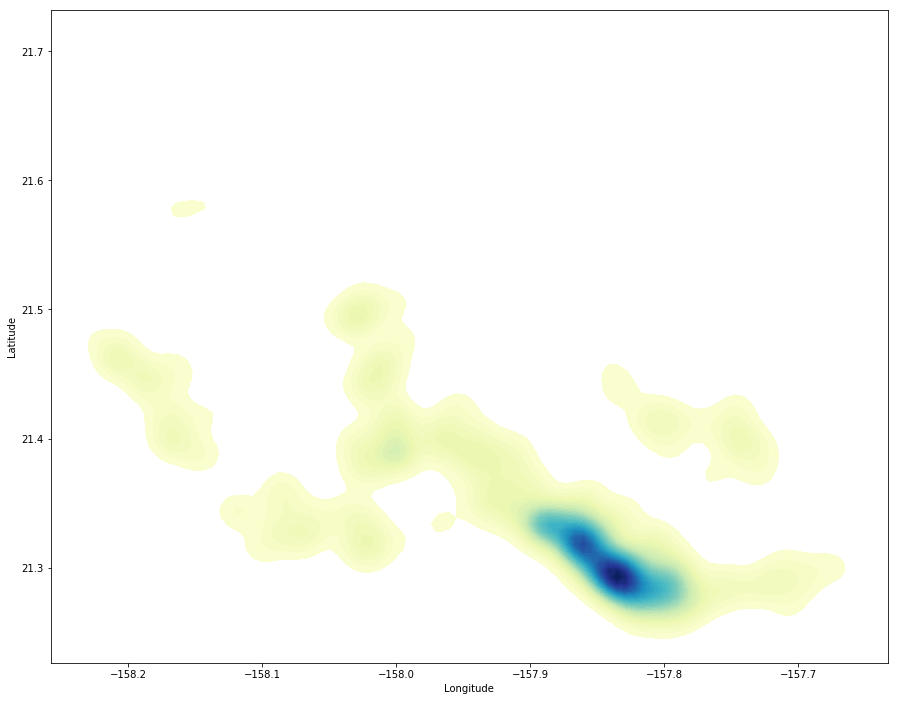

In [28]:
sns.kdeplot(BURGLARY['Longitude'],BURGLARY['Latitude'],n_levels=50, shade = True, shade_lowest = False, cmap = 'YlGnBu',bw = 0.01)

# 3. Add basemap

Now, you have created kernel density maps of the crimes. But what is missing? You can't associate the density with specific places, right?

Adding a basemap can help to know where the high density spots are located.

Read the Oahu census tract boundaries from a shapefile

In [29]:
# Change the file path to where your data is stored
ct = gpd.read_file("C:/Users/yi/Documents/UH_work/Teaching/GEOG389/labs/lab3_data/CensusTract_Oahu.shp")

Plot the boundaries

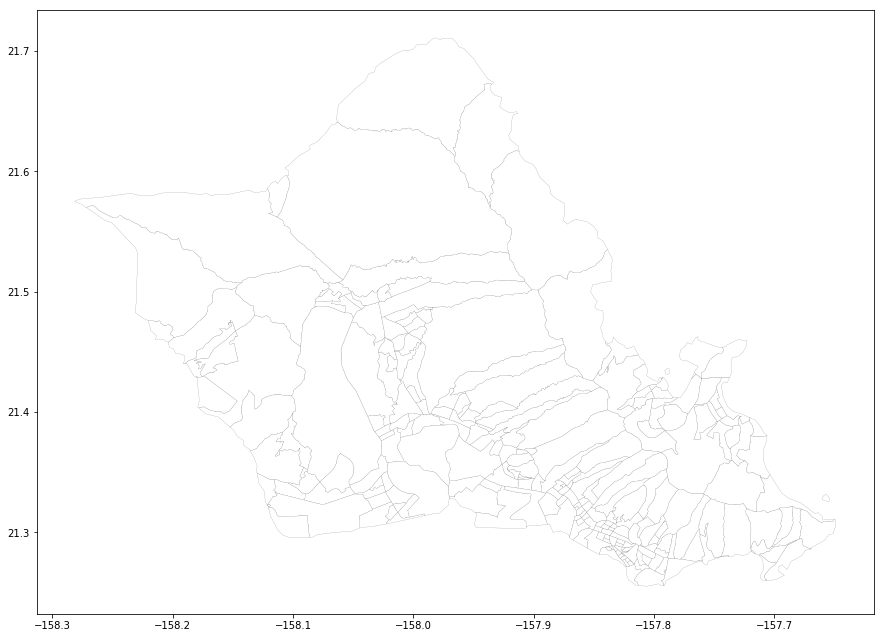

In [30]:
ct.plot(color='white', edgecolor='black', linewidth = .1)

Store the boundaries as a layer `ax1`

Note, the two steps (1. creating the base map layer, 2. plot the kernel density map) must be in the same code block.

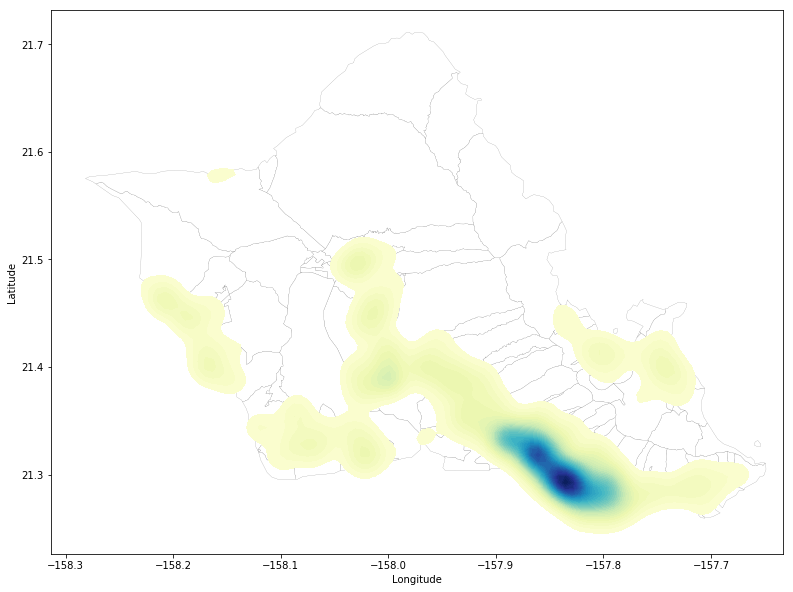

In [31]:
f, ax1 = plt.subplots(1, figsize=(15, 10))

ct.plot(color='white', edgecolor='black', linewidth = .1, ax=ax1)

sns.kdeplot(BURGLARY['Longitude'],BURGLARY['Latitude'],n_levels=50, shade = True, shade_lowest = False, 
            cmap = 'YlGnBu', bw = 0.01, ax = ax1)

#ax1.set_axis_off()
#plt.axis('equal')
plt.show()

Make the kernel density semi-transparent by changing the `alpha` parameter.

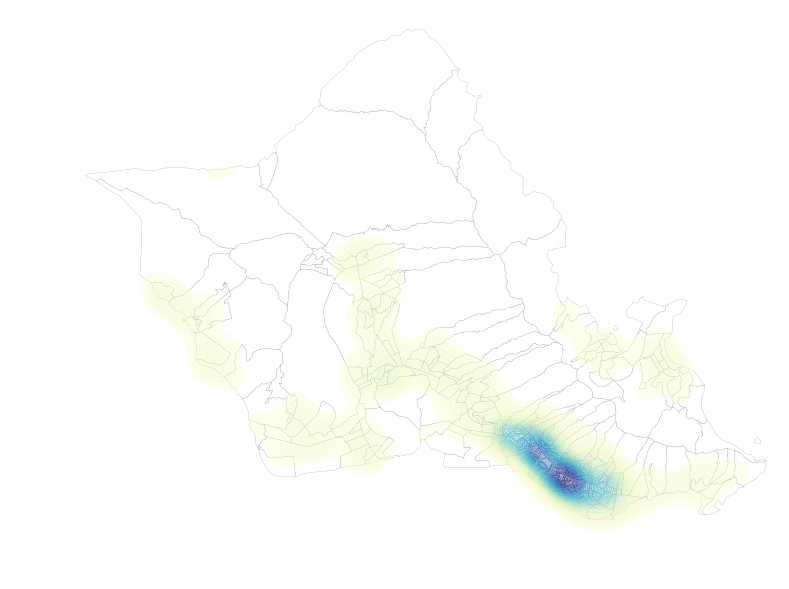

In [32]:
f, ax1 = plt.subplots(1, figsize=(15, 10))

ct.plot(color='white', edgecolor='black', linewidth = .1,ax=ax1)
sns.kdeplot(BURGLARY['Longitude'],BURGLARY['Latitude'],n_levels=50, shade = True, shade_lowest = False, 
            cmap = 'YlGnBu',alpha=0.4, bw = 0.01, ax = ax1)

ax1.set_axis_off()
#plt.axis('equal')
plt.show()

#### Install basemap

There is a bug of the `basemap` package, so you need to install it in the following way.

-  Run Anaconda Prompt as Administrator and type `conda config --add channels conda-forge`

- Type `conda install basemap` in the prompt

- Open jupyter from Anaconda prompt by typing 'jupyter notebook'

- Alternatively, you need to add the following lines in Python to change the path of the env. variable `PROJ_LIB`
 

Installation solution is from [here](https://github.com/matplotlib/basemap/issues/430)

In [33]:
import os
# You need to replace the path with the folder of Anaconda in your computer
os.environ['PROJ_LIB'] = 'C:/ProgramData/Anaconda3/Library/share/'

from mpl_toolkits.basemap import Basemap

Plot the kernel density of BURGLARY on top of a basemap

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-158.360531,21.237917,-157.569076,21.733486&bboxSR=4269&imageSR=4269&size=2000,1252&dpi=96&format=png32&transparent=true&f=image


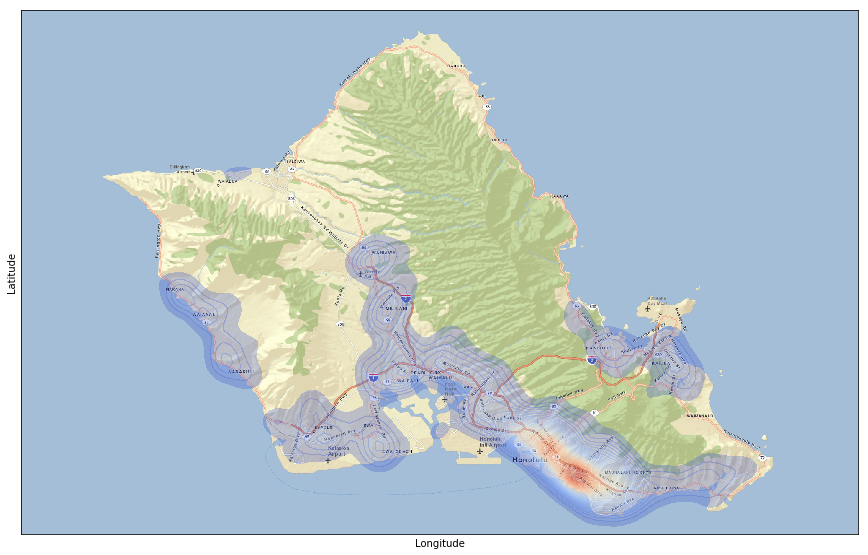

In [34]:
f, ax1 = plt.subplots(1, figsize=(15, 10))

map = Basemap(llcrnrlon=-158.360531,llcrnrlat=21.237917,urcrnrlon=-157.569076,urcrnrlat=21.733486, epsg=4269, ax=ax1)
#https://www.bdmweather.com/2018/04/python-m-arcgisimage-basemap-options/

map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 2000, verbose= True)

#ct.plot(color='white', edgecolor='black', linewidth = .1,ax=ax1)
sns.kdeplot(BURGLARY['Longitude'],BURGLARY['Latitude'],n_levels=50, shade = True, shade_lowest = False, 
            cmap = 'coolwarm', alpha=0.3, bw = 0.01, ax = ax1)

plt.show()


---

#### Please submit your code and screenshots of the output through Laulima, togeter with the questions in [Part 1](https://github.com/qiang-yi/GEOG389/blob/master/Jupyter/Lab3_part2.ipynb).

# Question 1

Plot the kernel density of the DUI (driving under the influence" incidents as a semi-transparent layer on top of a basemap.

You are free to try different basemaps from [here](https://www.bdmweather.com/2018/04/python-m-arcgisimage-basemap-options/).

# Answer to Question 2

You would need to run all code above in order to run the answer code.

![alt_text](images/fig10.jpg)

http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-158.360531,21.237917,-157.569076,21.733486&bboxSR=4269&imageSR=4269&size=2000,1252&dpi=96&format=png32&transparent=true&f=image


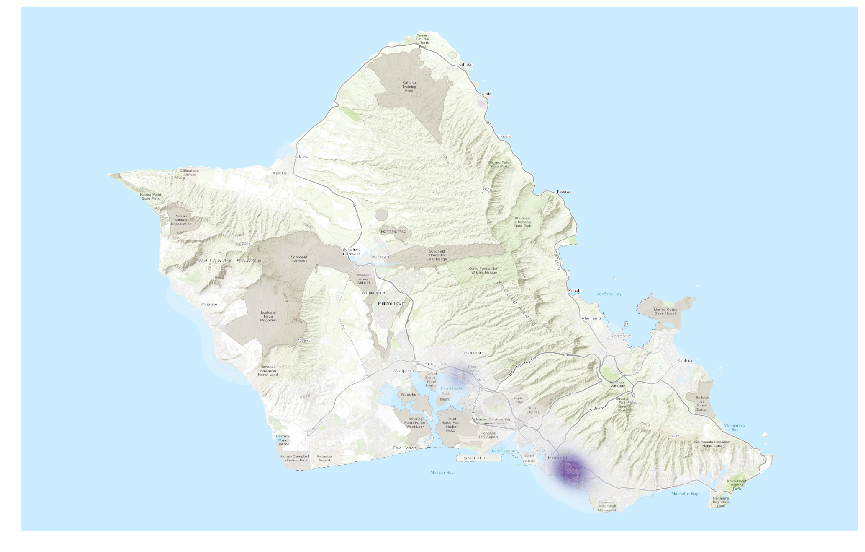

In [39]:
# create an empty canvas for plotting (i.e. ax1)
f, ax1 = plt.subplots(1, figsize=(15, 10))

# extract DUI locations
DUI =df[df['Offence_type'] == 'DUI']

# add a basemap as the bottom layer
map = Basemap(llcrnrlon=-158.360531,llcrnrlat=21.237917,urcrnrlon=-157.569076,urcrnrlat=21.733486, epsg=4269, ax=ax1)
map.arcgisimage(service='World_Topo_Map', xpixels = 2000, verbose= True)

# plot the kernel density of DUI points
sns.kdeplot(DUI['Longitude'], DUI['Latitude'],shade= True,  n_levels=50, shade_lowest=False,
            bw=0.01,cmap='Purples',alpha = 0.3, ax=ax1);

ax1.set_axis_off()

plt.show()


# Question 2

Plot the kernel density maps of BURGLARY and DUI in the same map, on top of a basemap. 

Use different colors for the two kernel density maps to distinguish them. More color schemes can be found from [here](https://matplotlib.org/tutorials/colors/colormaps.html).

Make one of the two crime layer semi-transparent (alpha = 0.4) so that the layer underneath is still visible.

Note: the creation of the baselayer and the two crime layers need to be in the same code block in Jupyter.

# Answer to Question 2

http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-158.360531,21.237917,-157.569076,21.733486&bboxSR=4269&imageSR=4269&size=2000,1252&dpi=96&format=png32&transparent=true&f=image


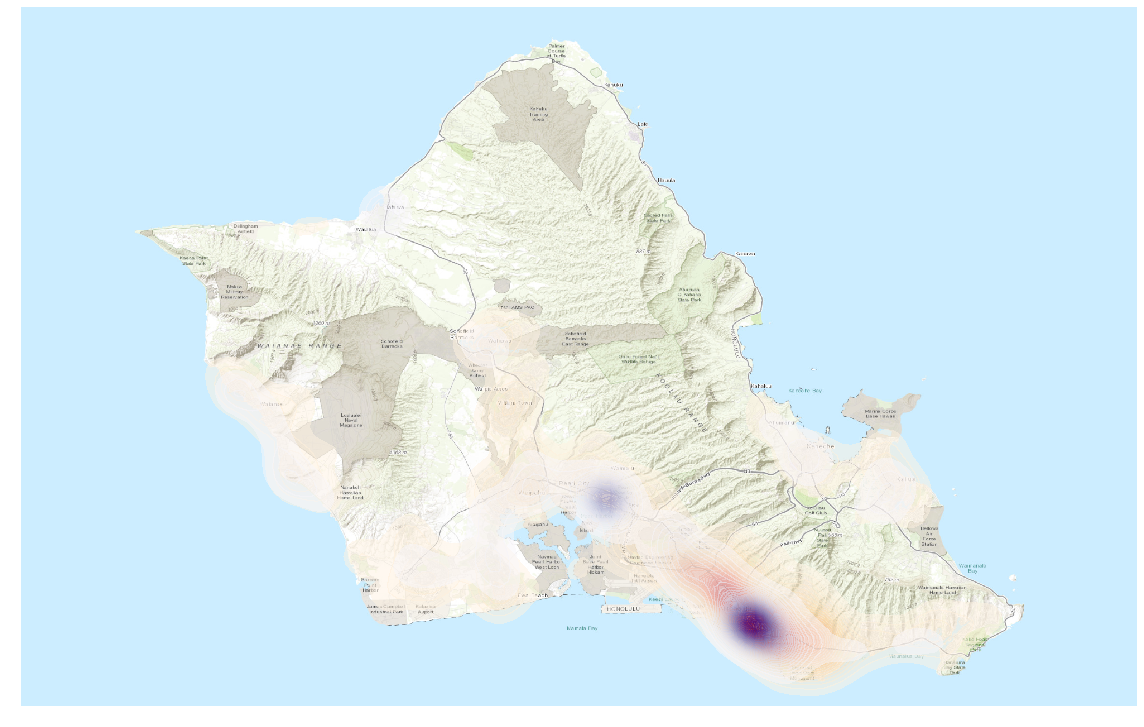

In [42]:
#Create an empty canvas
f, ax1 = plt.subplots(1, figsize=(20, 20))

# add a basemap as the bottom layer
map = Basemap(llcrnrlon=-158.360531,llcrnrlat=21.237917,urcrnrlon=-157.569076,urcrnrlat=21.733486, epsg=4269, ax=ax1)
map.arcgisimage(service='World_Topo_Map', xpixels = 2000, verbose= True)

# plot kernel density of Burglary points as the second layer
sns.kdeplot(BURGLARY['Longitude'], BURGLARY['Latitude'],shade= True,  n_levels=50, shade_lowest=False,bw=0.01, cmap='OrRd',alpha = 0.5, ax=ax1);

# plot kernel density of DUI as the third layer, and use a different color scheme
sns.kdeplot(DUI['Longitude'], DUI['Latitude'],shade= True,  n_levels=50, shade_lowest=False,bw=0.01, cmap='Purples',alpha = 0.5, ax=ax1);

ax1.set_axis_off()
#plt.axis('equal')
plt.show()